## Application to image denoising


In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# input-image + weight * noise (np.random.normal)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
# keep in range [0., 1]

In [2]:
print(x_train.shape)
print(x_train_noisy.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


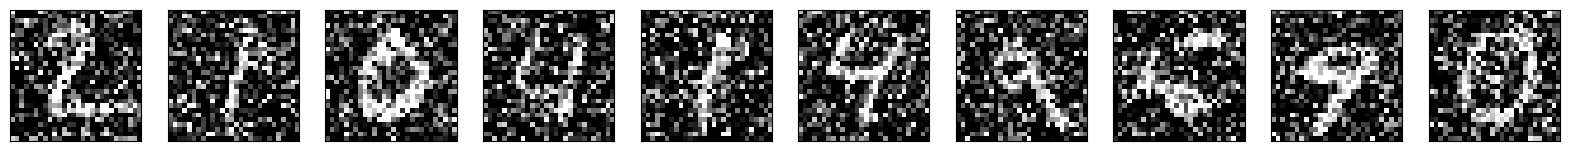

In [3]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [4]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

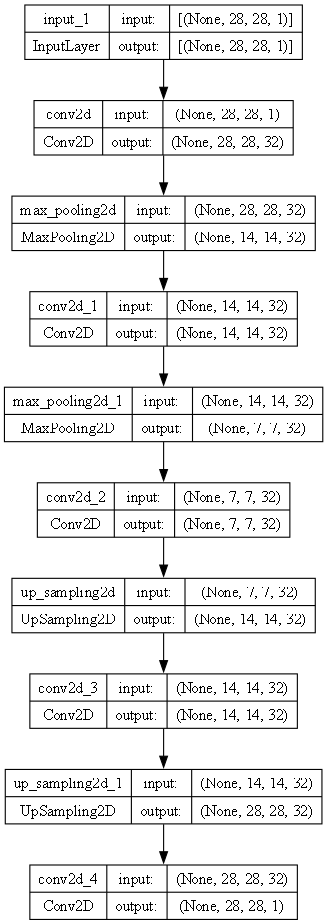

In [6]:
# plot_model autoencoder

from keras.utils import plot_model
plot_model(autoencoder, to_file='Apply_Denoising/autoencoder.png', dpi=80, show_shapes=True)

In [8]:
import tensorflow as tf
import shutil
from keras.callbacks import ModelCheckpoint

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs

# Mac/Linux
# !rm -rf ./tmp/tb

# Windows
shutil.rmtree("/tmp/tb", ignore_errors=True)

checkpointCNN = ModelCheckpoint("best_autoencoderDenoising", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Define the TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)

callbacks_list = [checkpointCNN, tensorboard_callback]


# Add the TensorBoard callback to the fit method
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=callbacks_list)

Epoch 1/100
468/469 [============================>.] - ETA: 0s - loss: 0.1633
Epoch 1: val_loss improved from inf to 0.11518, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 56ms/step - loss: 0.1632 - val_loss: 0.1152
Epoch 2/100
468/469 [============================>.] - ETA: 0s - loss: 0.1120
Epoch 2: val_loss improved from 0.11518 to 0.10735, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.1120 - val_loss: 0.1073
Epoch 3/100
469/469 [==============================] - ETA: 0s - loss: 0.1065
Epoch 3: val_loss improved from 0.10735 to 0.10382, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.1065 - val_loss: 0.1038
Epoch 4/100
468/469 [============================>.] - ETA: 0s - loss: 0.1037
Epoch 4: val_loss improved from 0.10382 to 0.10200, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.1037 - val_loss: 0.1020
Epoch 5/100
469/469 [==============================] - ETA: 0s - loss: 0.1020
Epoch 5: val_loss improved from 0.10200 to 0.10046, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.1020 - val_loss: 0.1005
Epoch 6/100
468/469 [============================>.] - ETA: 0s - loss: 0.1009
Epoch 6: val_loss improved from 0.10046 to 0.09975, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.1009 - val_loss: 0.0997
Epoch 7/100
469/469 [==============================] - ETA: 0s - loss: 0.0999
Epoch 7: val_loss improved from 0.09975 to 0.09879, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0999 - val_loss: 0.0988
Epoch 8/100
468/469 [============================>.] - ETA: 0s - loss: 0.0992
Epoch 8: val_loss improved from 0.09879 to 0.09825, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0992 - val_loss: 0.0983
Epoch 9/100
468/469 [============================>.] - ETA: 0s - loss: 0.0986
Epoch 9: val_loss improved from 0.09825 to 0.09757, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 54ms/step - loss: 0.0986 - val_loss: 0.0976
Epoch 10/100
469/469 [==============================] - ETA: 0s - loss: 0.0981
Epoch 10: val_loss improved from 0.09757 to 0.09714, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 25s 54ms/step - loss: 0.0981 - val_loss: 0.0971
Epoch 11/100
468/469 [============================>.] - ETA: 0s - loss: 0.0977
Epoch 11: val_loss improved from 0.09714 to 0.09680, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0977 - val_loss: 0.0968
Epoch 12/100
468/469 [============================>.] - ETA: 0s - loss: 0.0973
Epoch 12: val_loss improved from 0.09680 to 0.09644, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0973 - val_loss: 0.0964
Epoch 13/100
468/469 [============================>.] - ETA: 0s - loss: 0.0970
Epoch 13: val_loss improved from 0.09644 to 0.09627, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0970 - val_loss: 0.0963
Epoch 14/100
468/469 [============================>.] - ETA: 0s - loss: 0.0967
Epoch 14: val_loss improved from 0.09627 to 0.09594, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0967 - val_loss: 0.0959
Epoch 15/100
469/469 [==============================] - ETA: 0s - loss: 0.0966
Epoch 15: val_loss improved from 0.09594 to 0.09581, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0966 - val_loss: 0.0958
Epoch 16/100
468/469 [============================>.] - ETA: 0s - loss: 0.0963
Epoch 16: val_loss improved from 0.09581 to 0.09562, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0963 - val_loss: 0.0956
Epoch 17/100
468/469 [============================>.] - ETA: 0s - loss: 0.0961
Epoch 17: val_loss did not improve from 0.09562
469/469 [==============================] - 26s 55ms/step - loss: 0.0961 - val_loss: 0.0958
Epoch 18/100
468/469 [============================>.] - ETA: 0s - loss: 0.0959
Epoch 18: val_loss improved from 0.09562 to 0.09537, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0959 - val_loss: 0.0954
Epoch 19/100
468/469 [============================>.] - ETA: 0s - loss: 0.0958
Epoch 19: val_loss improved from 0.09537 to 0.09515, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0958 - val_loss: 0.0951
Epoch 20/100
468/469 [============================>.] - ETA: 0s - loss: 0.0956
Epoch 20: val_loss did not improve from 0.09515
469/469 [==============================] - 26s 55ms/step - loss: 0.0956 - val_loss: 0.0952
Epoch 21/100
468/469 [============================>.] - ETA: 0s - loss: 0.0955
Epoch 21: val_loss improved from 0.09515 to 0.09504, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0955 - val_loss: 0.0950
Epoch 22/100
468/469 [============================>.] - ETA: 0s - loss: 0.0954
Epoch 22: val_loss improved from 0.09504 to 0.09487, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0954 - val_loss: 0.0949
Epoch 23/100
468/469 [============================>.] - ETA: 0s - loss: 0.0953
Epoch 23: val_loss improved from 0.09487 to 0.09485, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0953 - val_loss: 0.0949
Epoch 24/100
468/469 [============================>.] - ETA: 0s - loss: 0.0952
Epoch 24: val_loss improved from 0.09485 to 0.09480, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0952 - val_loss: 0.0948
Epoch 25/100
468/469 [============================>.] - ETA: 0s - loss: 0.0950
Epoch 25: val_loss improved from 0.09480 to 0.09467, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0950 - val_loss: 0.0947
Epoch 26/100
468/469 [============================>.] - ETA: 0s - loss: 0.0950
Epoch 26: val_loss improved from 0.09467 to 0.09460, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 25s 54ms/step - loss: 0.0950 - val_loss: 0.0946
Epoch 27/100
468/469 [============================>.] - ETA: 0s - loss: 0.0949
Epoch 27: val_loss did not improve from 0.09460
469/469 [==============================] - 25s 54ms/step - loss: 0.0949 - val_loss: 0.0948
Epoch 28/100
468/469 [============================>.] - ETA: 0s - loss: 0.0948
Epoch 28: val_loss did not improve from 0.09460
469/469 [==============================] - 25s 54ms/step - loss: 0.0948 - val_loss: 0.0949
Epoch 29/100
468/469 [============================>.] - ETA: 0s - loss: 0.0948
Epoch 29: val_loss improved from 0.09460 to 0.09452, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0948 - val_loss: 0.0945
Epoch 30/100
468/469 [============================>.] - ETA: 0s - loss: 0.0947
Epoch 30: val_loss improved from 0.09452 to 0.09450, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0947 - val_loss: 0.0945
Epoch 31/100
468/469 [============================>.] - ETA: 0s - loss: 0.0946
Epoch 31: val_loss improved from 0.09450 to 0.09418, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 59ms/step - loss: 0.0946 - val_loss: 0.0942
Epoch 32/100
468/469 [============================>.] - ETA: 0s - loss: 0.0946
Epoch 32: val_loss did not improve from 0.09418
469/469 [==============================] - 26s 56ms/step - loss: 0.0946 - val_loss: 0.0943
Epoch 33/100
468/469 [============================>.] - ETA: 0s - loss: 0.0945
Epoch 33: val_loss improved from 0.09418 to 0.09412, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0945 - val_loss: 0.0941
Epoch 34/100
468/469 [============================>.] - ETA: 0s - loss: 0.0945
Epoch 34: val_loss did not improve from 0.09412
469/469 [==============================] - 26s 55ms/step - loss: 0.0945 - val_loss: 0.0942
Epoch 35/100
468/469 [============================>.] - ETA: 0s - loss: 0.0945
Epoch 35: val_loss did not improve from 0.09412
469/469 [==============================] - 25s 54ms/step - loss: 0.0945 - val_loss: 0.0942
Epoch 36/100
468/469 [============================>.] - ETA: 0s - loss: 0.0944
Epoch 36: val_loss improved from 0.09412 to 0.09396, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 54ms/step - loss: 0.0944 - val_loss: 0.0940
Epoch 37/100
468/469 [============================>.] - ETA: 0s - loss: 0.0943
Epoch 37: val_loss improved from 0.09396 to 0.09393, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0943 - val_loss: 0.0939
Epoch 38/100
468/469 [============================>.] - ETA: 0s - loss: 0.0943
Epoch 38: val_loss did not improve from 0.09393
469/469 [==============================] - 25s 54ms/step - loss: 0.0943 - val_loss: 0.0941
Epoch 39/100
469/469 [==============================] - ETA: 0s - loss: 0.0943
Epoch 39: val_loss did not improve from 0.09393
469/469 [==============================] - 25s 53ms/step - loss: 0.0943 - val_loss: 0.0942
Epoch 40/100
469/469 [==============================] - ETA: 0s - loss: 0.0942
Epoch 40: val_loss did not improve from 0.09393
469/469 [==============================] - 25s 54ms/step - loss: 0.0942 - val_loss: 0.0942
Epoch 41/100
468/469 [============================>.] - ETA: 0s - loss: 0.0942
Epoch 41: val_loss did not improve from 0.09393
469/469 [==============================] - 25s 54ms/step - loss: 0.0942 - val_loss: 0.0940
Epoch 42/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0941 - val_loss: 0.0939
Epoch 44/100
468/469 [============================>.] - ETA: 0s - loss: 0.0941
Epoch 44: val_loss improved from 0.09385 to 0.09383, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0941 - val_loss: 0.0938
Epoch 45/100
468/469 [============================>.] - ETA: 0s - loss: 0.0941
Epoch 45: val_loss did not improve from 0.09383
469/469 [==============================] - 26s 55ms/step - loss: 0.0940 - val_loss: 0.0940
Epoch 46/100
468/469 [============================>.] - ETA: 0s - loss: 0.0940
Epoch 46: val_loss did not improve from 0.09383
469/469 [==============================] - 25s 54ms/step - loss: 0.0940 - val_loss: 0.0941
Epoch 47/100
468/469 [============================>.] - ETA: 0s - loss: 0.0940
Epoch 47: val_loss improved from 0.09383 to 0.09372, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0940 - val_loss: 0.0937
Epoch 48/100
468/469 [============================>.] - ETA: 0s - loss: 0.0940
Epoch 48: val_loss did not improve from 0.09372
469/469 [==============================] - 26s 56ms/step - loss: 0.0940 - val_loss: 0.0938
Epoch 49/100
468/469 [============================>.] - ETA: 0s - loss: 0.0939
Epoch 49: val_loss did not improve from 0.09372
469/469 [==============================] - 26s 55ms/step - loss: 0.0940 - val_loss: 0.0939
Epoch 50/100
468/469 [============================>.] - ETA: 0s - loss: 0.0939
Epoch 50: val_loss did not improve from 0.09372
469/469 [==============================] - 26s 54ms/step - loss: 0.0939 - val_loss: 0.0938
Epoch 51/100
468/469 [============================>.] - ETA: 0s - loss: 0.0939
Epoch 51: val_loss did not improve from 0.09372
469/469 [==============================] - 26s 55ms/step - loss: 0.0939 - val_loss: 0.0938
Epoch 52/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0939 - val_loss: 0.0937
Epoch 53/100
468/469 [============================>.] - ETA: 0s - loss: 0.0938
Epoch 53: val_loss improved from 0.09371 to 0.09367, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0939 - val_loss: 0.0937
Epoch 54/100
468/469 [============================>.] - ETA: 0s - loss: 0.0938
Epoch 54: val_loss improved from 0.09367 to 0.09367, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0938 - val_loss: 0.0937
Epoch 55/100
468/469 [============================>.] - ETA: 0s - loss: 0.0938
Epoch 55: val_loss improved from 0.09367 to 0.09366, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0938 - val_loss: 0.0937
Epoch 56/100
468/469 [============================>.] - ETA: 0s - loss: 0.0938
Epoch 56: val_loss improved from 0.09366 to 0.09357, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0938 - val_loss: 0.0936
Epoch 57/100
468/469 [============================>.] - ETA: 0s - loss: 0.0938
Epoch 57: val_loss did not improve from 0.09357
469/469 [==============================] - 26s 56ms/step - loss: 0.0938 - val_loss: 0.0936
Epoch 58/100
469/469 [==============================] - ETA: 0s - loss: 0.0937
Epoch 58: val_loss did not improve from 0.09357
469/469 [==============================] - 26s 56ms/step - loss: 0.0937 - val_loss: 0.0937
Epoch 59/100
468/469 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 59: val_loss did not improve from 0.09357
469/469 [==============================] - 26s 55ms/step - loss: 0.0937 - val_loss: 0.0937
Epoch 60/100
468/469 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 60: val_loss did not improve from 0.09357
469/469 [==============================] - 26s 56ms/step - loss: 0.0937 - val_loss: 0.0936
Epoch 61/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0937 - val_loss: 0.0935
Epoch 62/100
468/469 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 62: val_loss did not improve from 0.09349
469/469 [==============================] - 26s 54ms/step - loss: 0.0937 - val_loss: 0.0935
Epoch 63/100
468/469 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 63: val_loss improved from 0.09349 to 0.09343, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0937 - val_loss: 0.0934
Epoch 64/100
468/469 [============================>.] - ETA: 0s - loss: 0.0936
Epoch 64: val_loss improved from 0.09343 to 0.09342, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0936 - val_loss: 0.0934
Epoch 65/100
468/469 [============================>.] - ETA: 0s - loss: 0.0936
Epoch 65: val_loss did not improve from 0.09342
469/469 [==============================] - 26s 55ms/step - loss: 0.0936 - val_loss: 0.0936
Epoch 66/100
468/469 [============================>.] - ETA: 0s - loss: 0.0936
Epoch 66: val_loss did not improve from 0.09342
469/469 [==============================] - 26s 55ms/step - loss: 0.0936 - val_loss: 0.0935
Epoch 67/100
468/469 [============================>.] - ETA: 0s - loss: 0.0936
Epoch 67: val_loss did not improve from 0.09342
469/469 [==============================] - 25s 54ms/step - loss: 0.0936 - val_loss: 0.0935
Epoch 68/100
469/469 [==============================] - ETA: 0s - loss: 0.0936
Epoch 68: val_loss did not improve from 0.09342
469/469 [==============================] - 25s 54ms/step - loss: 0.0936 - val_loss: 0.0935
Epoch 69/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0936 - val_loss: 0.0933
Epoch 71/100
468/469 [============================>.] - ETA: 0s - loss: 0.0936
Epoch 71: val_loss did not improve from 0.09331
469/469 [==============================] - 26s 55ms/step - loss: 0.0936 - val_loss: 0.0935
Epoch 72/100
468/469 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 72: val_loss improved from 0.09331 to 0.09328, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0935 - val_loss: 0.0933
Epoch 73/100
469/469 [==============================] - ETA: 0s - loss: 0.0935
Epoch 73: val_loss did not improve from 0.09328
469/469 [==============================] - 26s 56ms/step - loss: 0.0935 - val_loss: 0.0936
Epoch 74/100
468/469 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 74: val_loss did not improve from 0.09328
469/469 [==============================] - 26s 56ms/step - loss: 0.0935 - val_loss: 0.0938
Epoch 75/100
468/469 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 75: val_loss did not improve from 0.09328
469/469 [==============================] - 26s 55ms/step - loss: 0.0935 - val_loss: 0.0933
Epoch 76/100
468/469 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 76: val_loss did not improve from 0.09328
469/469 [==============================] - 26s 55ms/step - loss: 0.0935 - val_loss: 0.0933
Epoch 77/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0934 - val_loss: 0.0932
Epoch 83/100
468/469 [============================>.] - ETA: 0s - loss: 0.0934
Epoch 83: val_loss did not improve from 0.09321
469/469 [==============================] - 26s 56ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 84/100
468/469 [============================>.] - ETA: 0s - loss: 0.0934
Epoch 84: val_loss did not improve from 0.09321
469/469 [==============================] - 26s 56ms/step - loss: 0.0934 - val_loss: 0.0935
Epoch 85/100
468/469 [============================>.] - ETA: 0s - loss: 0.0934
Epoch 85: val_loss did not improve from 0.09321
469/469 [==============================] - 26s 56ms/step - loss: 0.0934 - val_loss: 0.0936
Epoch 86/100
468/469 [============================>.] - ETA: 0s - loss: 0.0934
Epoch 86: val_loss improved from 0.09321 to 0.09321, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0934 - val_loss: 0.0932
Epoch 87/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 87: val_loss did not improve from 0.09321
469/469 [==============================] - 28s 59ms/step - loss: 0.0933 - val_loss: 0.0934
Epoch 88/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 88: val_loss did not improve from 0.09321
469/469 [==============================] - 26s 56ms/step - loss: 0.0933 - val_loss: 0.0937
Epoch 89/100
468/469 [============================>.] - ETA: 0s - loss: 0.0934
Epoch 89: val_loss did not improve from 0.09321
469/469 [==============================] - 26s 54ms/step - loss: 0.0934 - val_loss: 0.0936
Epoch 90/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 90: val_loss did not improve from 0.09321
469/469 [==============================] - 26s 56ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 91/100
469/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 93/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 93: val_loss did not improve from 0.09319
469/469 [==============================] - 26s 55ms/step - loss: 0.0933 - val_loss: 0.0935
Epoch 94/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 94: val_loss improved from 0.09319 to 0.09316, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 55ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 95/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 95: val_loss improved from 0.09316 to 0.09311, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0933 - val_loss: 0.0931
Epoch 96/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 96: val_loss did not improve from 0.09311
469/469 [==============================] - 26s 55ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 97/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 97: val_loss did not improve from 0.09311
469/469 [==============================] - 25s 53ms/step - loss: 0.0933 - val_loss: 0.0931
Epoch 98/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 98: val_loss did not improve from 0.09311
469/469 [==============================] - 25s 54ms/step - loss: 0.0933 - val_loss: 0.0936
Epoch 99/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 99: val_loss did not improve from 0.09311
469/469 [==============================] - 25s 53ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 100/100
468/469 [==============

In [9]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 2s 5ms/step


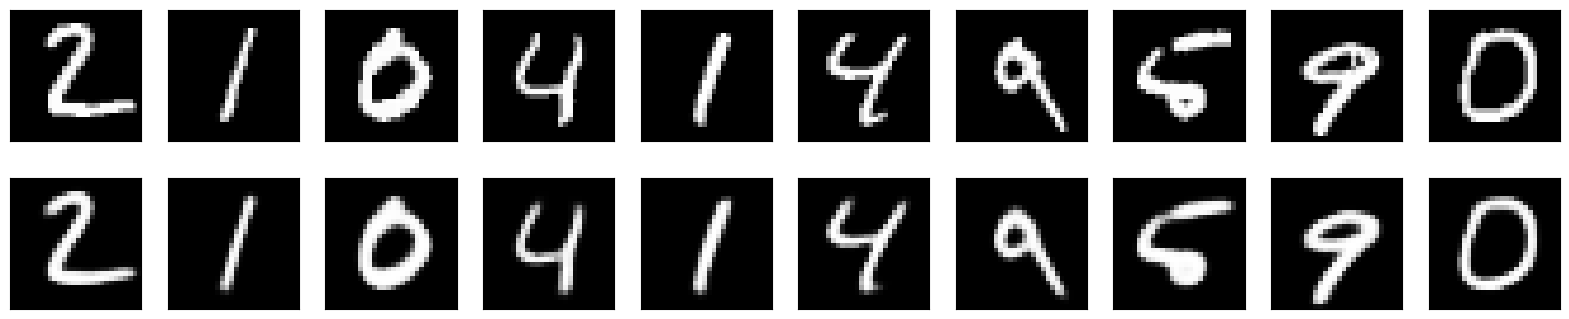

In [10]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display noisy
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()